# Show GradCAM explanations using ELI5 library in Python

Heavily adapted from https://eli5.readthedocs.io/en/latest/tutorials/keras-image-classifiers.html

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import time

import tensorflow as tf
import tensorflow_datasets as tfds

!pip install --upgrade tensorflow_hub
!pip install eli5
import tensorflow_hub as hub
import eli5 # for GradCAM predictions

import logging
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.disable_eager_execution()
import warnings
warnings.simplefilter("ignore")

     |████████████████████████████████| 106 kB 5.5 MB/s 


In [ ]:
class_names = {
    0: 'dandelion',
    1: 'daisy',
    2: 'tulips',
    3: 'sunflowers',
    4: 'roses'
}

In [ ]:
# Load SavedModel from Google Drive
# Model was trained using Transfer Learning using a InceptionResNetv2 model pre-trained on ImageNet
!cp /content/drive/MyDrive/xai/ir2-flowers-model.zip pre-trained-model.zip
!unzip pre-trained-model.zip

Archive:  pre-trained-model.zip
   creating: saved_model/ir2-flowers-model/
  inflating: saved_model/ir2-flowers-model/saved_model.pb  
   creating: saved_model/ir2-flowers-model/variables/
  inflating: saved_model/ir2-flowers-model/variables/variables.data-00000-of-00001  
  inflating: saved_model/ir2-flowers-model/variables/variables.index  
   creating: saved_model/ir2-flowers-model/assets/
  inflating: saved_model/ir2-flowers-model/keras_metadata.pb  


In [ ]:
# Load Saved Model
saved_model_path = '/content/saved_model/ir2-flowers-model'
model = tf.keras.models.load_model(saved_model_path)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# check the input format
print(model.input_shape)
dims = model.input_shape[1:3] # -> (height, width)
print(dims)

(None, 224, 224, 3)
(224, 224)


<class 'PIL.WebPImagePlugin.WebPImageFile'>


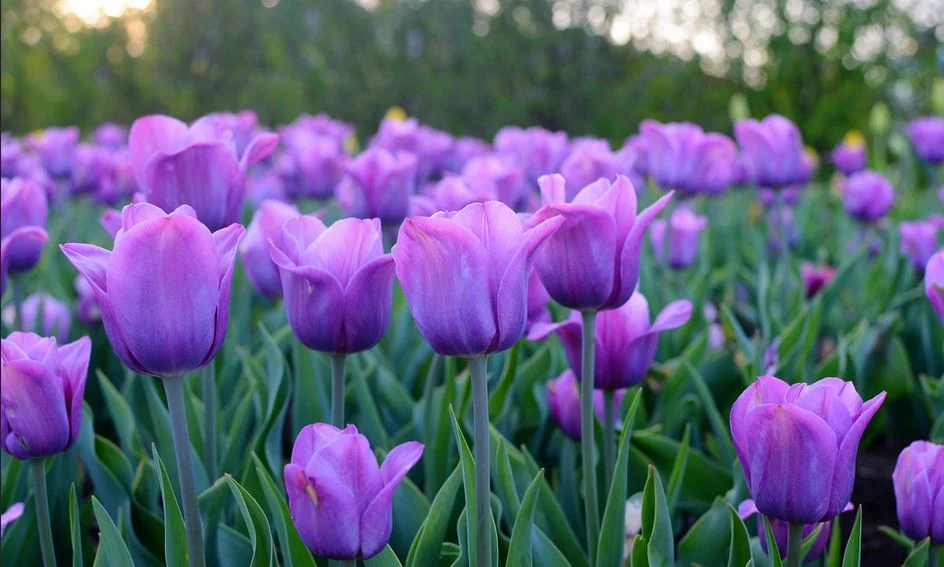

In [ ]:
from PIL import Image
image_uri = '/content/drive/MyDrive/xai/tulips.jpeg'

# this is the original "cat dog" image used in the Grad-CAM paper
# check the image with Pillow
im = Image.open(image_uri)
print(type(im))
display(im)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F5B43C03590>


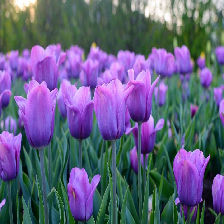

In [ ]:
# Image resize
im = tf.keras.preprocessing.image.load_img(image_uri, target_size=dims) # -> PIL image
print(im)
display(im)

In [ ]:
doc = tf.keras.preprocessing.image.img_to_array(im)
print(type(doc), doc.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [ ]:
doc = np.expand_dims(doc, axis=0)
print(type(doc), doc.shape)

<class 'numpy.ndarray'> (1, 224, 224, 3)


<PIL.Image.Image image mode=RGB size=224x224 at 0x7F5B43D01F10>


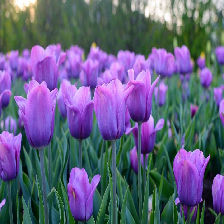

In [ ]:
image = tf.keras.preprocessing.image.array_to_img(doc[0])
print(image)
display(image)

In [ ]:
predictions = model.predict(doc / 255.0)
predictions, class_names[np.argmax(predictions)]

(array([[9.9401013e-04, 9.4801822e-04, 9.7415292e-01, 6.6710828e-04,
         2.3237882e-02]], dtype=float32), 'tulips')

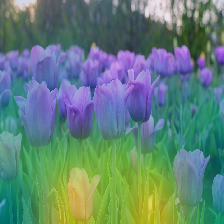

In [ ]:
eli5.show_prediction(model, doc / 255.0)